## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is when the outcome someone predicts is numeric or continuous (ex: predicting sale). Classification is when the outcome someone predicts is categorical (ex: prediciting vehicle class).
2. Confusion table is a cross-stabulation of predicted categories vs. the actual (true) categories. Such as putting the actual and predicted categories against each other and looking for patterns in successes and failures. You can see which clases the model gets right or what kinds of mistakes it makes and if the errors are asymmetric.
3. Sum of squred error quantifies how far the model's pred are from the true outcomes on a test set. The bigger the SSE, the farther the predictions are from the overall.
4. Overfitting is when the model is too complex or local so it looks unrealisticallly precise and could be highlighting patterns that are too specific to the dataset you're using particularly than the general broader population. You end up with a very small k. Underfitting is when the model is too simple or smoothed out where it is unrealisticallly imprecise and doesn't show the structure in the data well. This leads to a largwe k where the pred start to "mush" towards an average.
5. You can chooso a model that is more likely to work on new and unseen data (instead of just the one you trained on). You want external validity and generalizability where a model that fits the training data well is not guarentted to fit new data well. To mimic uncertainty, dat the model has not seen should be used. From there, you would try different k values and pick the one with the lowest SSE which how you can avoid picking a k that "looks good" from overfitting the training data.
6. Predicting a calss label means that the model outputs a category. You would choose the most common class among the k nearest neighbors. This is a strong approach as it's simple and easy to interpret, but is a weakness as it hides uncertainty (close vote among neighbors or an overwhelmcing majority (but you can't tell which)). Predicting a prob distribution means tha model reprots how likely each class is. This is from the frequency of each class among the k neighbors. This is strong as it shows uncertainty and lets you see when the model is unsure, but is a weakness as it can be slightly harder to interpret and still dpends on k (when large, the probabilities can become less sharp as you are averaging over many neighbors).

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

1. There are no NA's to handle. Shape is (2499, 3).
4. k = 3 | MSE = 133,487,993.50 k = 10 | MSE = 111,643,143.62 k = 25 | MSE = 104,946,230.11 k = 50 | MSE = 103,867,056.36 k = 100 | MSE = 104,534,620.68 k = 300 | MSE = 107,656,474.54. As k increases, the prediction looks less jumpy and the scatter looks more stable (MSE falls), which is what we saw in class that increasing k makes the pred look softer as you average over more neighbors. Once the k gets large (100/300), the pred look more compressed towards the middle into a narrowed band the MSE rises (a good example to my explanation in part 1 about it turning to mush).
5. The optimal number of neighbors is k=28 becase it gave the loweest test MSE
6. When k was small (ex: 3), the model was very local where each prediction depended on only a few nearby cars, making it more "jumpy" and sensitive to noises in the training data (consistent with overfitting). As k increased into 25-50, the best result was near k=28, and predictions became more stable because each pred averaged over more neighbors. The plots looked less erratic and the test MSE was lower. Then when k got larger 100+, the model started averageing over so many neighbors that it became too smoothed out where the predicted values were pulled toward a more common middle range instead of adjusting to truly high or low prices (underfitting).

In [3]:
import pandas as pd

df = pd.read_csv("../data/USA_cars_datasets.csv")
df = df[["price", "year", "mileage"]]

print(df.shape)
print(df.isna().sum())
df.head()


(2499, 3)
price      0
year       0
mileage    0
dtype: int64


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [4]:
import numpy as np

def maxmin(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))

# normalized copy for modeling
df2 = df.copy()
df2[["year", "mileage"]] = df2[["year", "mileage"]].apply(maxmin)

print(df2[["year", "mileage"]].describe())
df2.head()

              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [5]:
from sklearn.model_selection import train_test_split

y = df2["price"]
X = df2[["year", "mileage"]]

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=65  # fixed seed so results are reproducible
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1999, 2) (500, 2)
(1999,) (500,)


k =   3 | MSE = 133,487,993.50


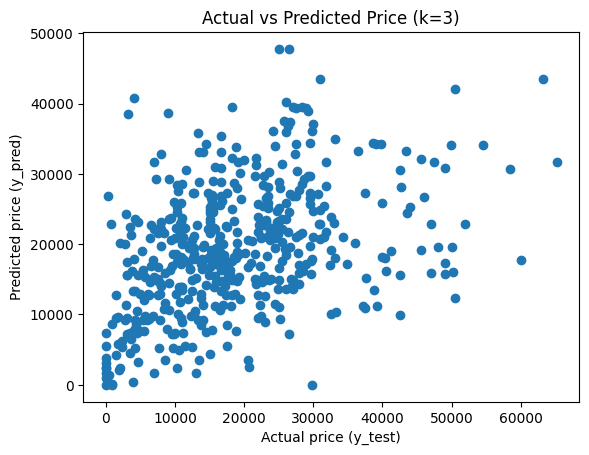

k =  10 | MSE = 111,643,143.62


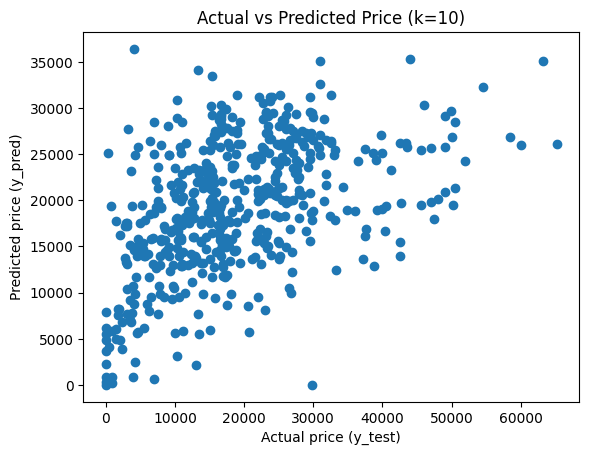

k =  25 | MSE = 104,946,230.11


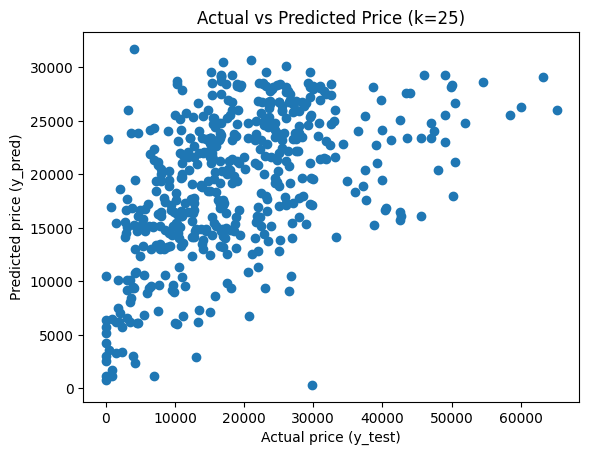

k =  50 | MSE = 103,867,056.36


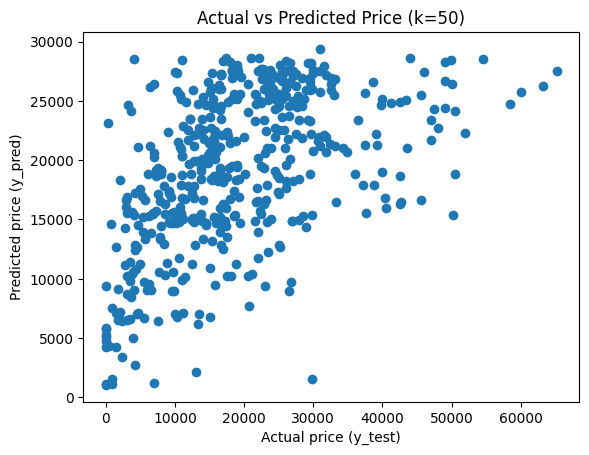

k = 100 | MSE = 104,534,620.68


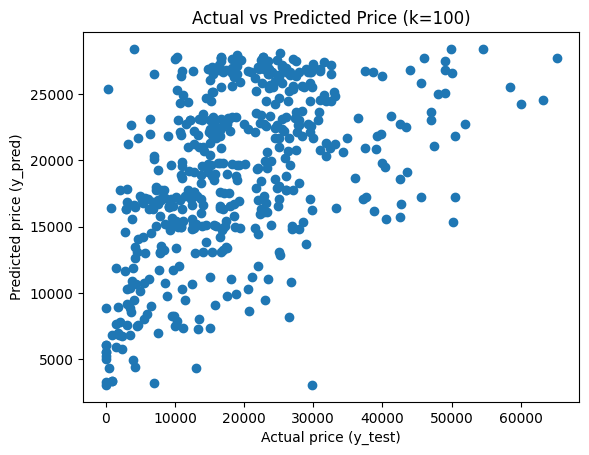

k = 300 | MSE = 107,656,474.54


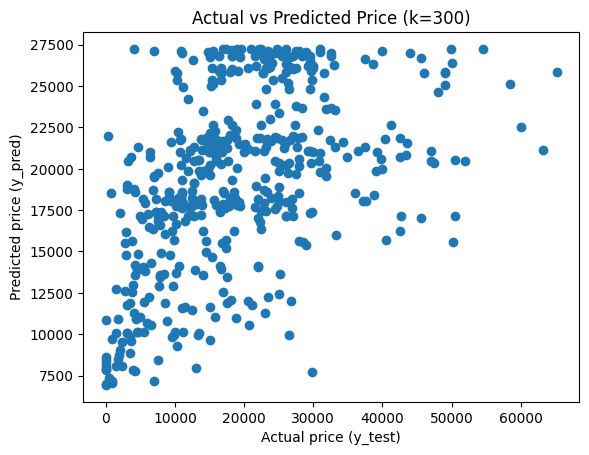

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

k_list = [3, 10, 25, 50, 100, 300]

for k in k_list:
    # fit model on training data
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)

    # predict on test data
    y_pred = fitted_model.predict(X_test)

    # mean squared error
    mse = np.mean((y_test - y_pred)**2)
    print(f"k = {k:>3} | MSE = {mse:,.2f}")

    # scatterplot: actual vs predicted
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual price (y_test)")
    plt.ylabel("Predicted price (y_pred)")
    plt.title(f"Actual vs Predicted Price (k={k})")
    plt.show()

Optimal k: 28
Minimum test MSE: 103574601.02516071


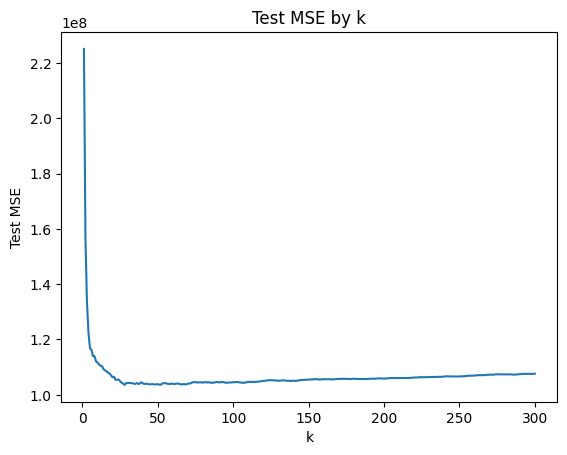

In [ ]:
k_bar = 300
mse_list = []

for k in range(1, k_bar + 1):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train, y_train)
    y_pred = fitted_model.predict(X_test)
    mse = np.mean((y_test - y_pred)**2)
    mse_list.append(mse)

# optimal k
mse_min = np.min(mse_list)
k_star = np.argmin(mse_list) + 1  # +1 because index 0 corresponds to k=1
print("Optimal k:", k_star)
print("Minimum test MSE:", mse_min)

# plot MSE by k
plt.figure()
plt.plot(range(1, k_bar + 1), mse_list)
plt.xlabel("k")
plt.ylabel("Test MSE")
plt.title("Test MSE by k")
plt.show()

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

1. There are 101 animals and 16 characteristics. The classes take values 1-7 and are not distributed evenly. Class 1 is the largest and 5/3 are the smallest. Class 1 has animals like advark, antelope, bear, dolphin, elephant, etc, which seem to be all mammals. Class 2 has chicken, crow, duck, penguin, etc. which are birds. Class 3 are tortoise, tuatara, etc. which are reptiles. Looking along, class 4 seems to be fish, class 5 is amphibians, class 6 insect, class 7 invertebrates. Based on the feature names and these groups, some vars should be predictive, such as milk and hair are strong contenders to class 1. Other features liike eggs and backbone will also help differentiate.
3. Using all 16 vars, the best test accuracy by trying a range of k values that maximizes the test-set accuracy was k=1 with accuracy 0.961. As k increased, the accuracy generally decreased (became too smoothed out).
4. Test accuracy of 0.9608 (49/51). The confusion table shows that the classes 1,2,4,5,6,7 are predicted in the test split (all couints are on the diag). Only class 3 has errors which is likely from class 3 being small (as I had mentioned in part 1).
5. The best model using the those features is k=2, which a test accuracy of 0.7451. The confjusion table shows pred collapse into a subset of labels (1,2,4). Many observations from class 3,5,6,7 get predicted as class 2/4. This makes sense as having only three features, there can be many different animals sharing these combinations, which means that the model did not have enough information to be distinct between the seven groups. predict_proba includes all 7 classes because the training split contains at least one example of each, so the model can assign probabilities to every class. But with only milk, aquatic, and airborne, most nearest neighbors fall into a few classes, so the final predicted label often ends up as 1, 2, or 4. 

In [10]:
import pandas as pd

zoo = pd.read_csv("../data/zoo.csv")

for c in sorted(zoo["class"].unique()):
    animals_in_class = zoo.loc[zoo["class"] == c, "animal"].tolist()
    print(f"\nClass {c} (n={len(animals_in_class)}):")
    print(animals_in_class)


Class 1 (n=41):
['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']

Class 2 (n=20):
['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']

Class 3 (n=5):
['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']

Class 4 (n=13):
['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']

Class 5 (n=4):
['frog', 'frog', 'newt', 'toad']

Class 6 (n=8):
['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp']



In [11]:
import pandas as pd

zoo = pd.read_csv("../data/zoo.csv")

y = zoo["class"]
X = zoo.drop(columns=["animal", "class"])  # use all 16 characteristics

# 50/50 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=100
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)
print("\nTrain class counts:\n", y_train.value_counts().sort_index())
print("\nTest class counts:\n", y_test.value_counts().sort_index())

X_train: (50, 16) X_test: (51, 16)
y_train: (50,) y_test: (51,)

Train class counts:
 class
1    18
2     8
3     2
4    10
5     1
6     3
7     8
Name: count, dtype: int64

Test class counts:
 class
1    23
2    12
3     3
4     3
5     3
6     5
7     2
Name: count, dtype: int64


Optimal k: 1
Best test accuracy: 0.9607843137254902


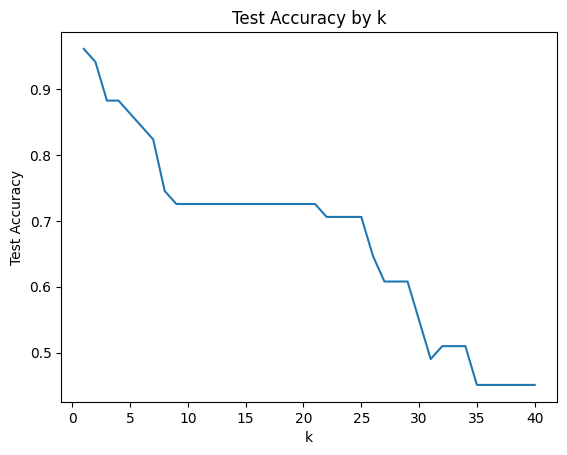

,n_neighbors,np.int64(1)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
from sklearn.neighbors import KNeighborsClassifier
N_test = len(y_test)
k_bar = 40
Acc = []

for k in range(1, k_bar + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    fitted_model = model.fit(X_train.values, y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc.append(np.sum(y_hat == y_test) / N_test)

# best k
Acc_max = np.max(Acc)
k_star = np.argmax(Acc) + 1
print("Optimal k:", k_star)
print("Best test accuracy:", Acc_max)

plt.figure()
plt.plot(range(1, k_bar + 1), Acc)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy by k")
plt.show()

best_model = KNeighborsClassifier(n_neighbors=k_star)
best_model.fit(X_train.values, y_train)

In [14]:
k_star = 1
best_model = KNeighborsClassifier(n_neighbors=k_star)
best_model.fit(X_train.values, y_train)

# Predict on test set
y_hat = best_model.predict(X_test.values)

# Acc
acc = np.mean(y_hat == y_test)
print("Test accuracy:", acc)

# Confusion table
conf = pd.crosstab(y_test, y_hat, rownames=["Actual"], colnames=["Predicted"])
conf

Test accuracy: 0.9607843137254902


Predicted,1,2,3,4,5,6,7
Actual,,,,,,,
1,23,0,0,0,0,0,0
2,0,12,0,0,0,0,0
3,0,0,1,1,1,0,0
4,0,0,0,3,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,0,2


In [15]:
from sklearn.model_selection import train_test_split

X3 = zoo[["milk", "aquatic", "airborne"]]
y = zoo["class"]
X3_train, X3_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.5, random_state=100
)

k_bar = 40
Acc3 = []
N_test = len(y_test)

for k in range(1, k_bar + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X3_train.values, y_train)
    y_hat = model.predict(X3_test.values)
    Acc3.append(np.mean(y_hat == y_test))

k3_star = np.argmax(Acc3) + 1
print("Optimal k (3 features):", k3_star)
print("Best test accuracy (3 features):", np.max(Acc3))

# fiting optimal 3-feature model
model3 = KNeighborsClassifier(n_neighbors=k3_star)
model3.fit(X3_train.values, y_train)
y_hat3 = model3.predict(X3_test.values)

conf3 = pd.crosstab(y_test, y_hat3, rownames=["Actual"], colnames=["Predicted"])
print(conf3)

# Predict probabilities
proba = model3.predict_proba(X3_test.values)

print("\nClasses in model (probability columns):", model3.classes_)
print("Number of classes represented:", len(model3.classes_))

proba_df = pd.DataFrame(proba, columns=model3.classes_)
proba_df.head()


Optimal k (3 features): 2
Best test accuracy (3 features): 0.7450980392156863
Predicted   1   2  4
Actual              
1          23   0  0
2           0  12  0
3           0   2  1
4           0   0  3
5           0   0  3
6           0   5  0
7           0   0  2

Classes in model (probability columns): [1 2 3 4 5 6 7]
Number of classes represented: 7


,1,2,3,4,5,6,7
0,0.0,0.5,0.0,0.0,0.0,0.5,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def silverman_bandwidth(x):
    n = len(x)
    s = np.std(x, ddof=1)
    if s == 0:
        return 1e-6
    return 1.06 * s * (n ** (-1/5))

def kernel_function(u, kernel="gaussian"):
    if kernel == "gaussian":
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)
    elif kernel in ["uniform", "bump"]:
        return 0.5 * (np.abs(u) <= 1).astype(float)
    elif kernel == "epanechnikov":
        out = np.zeros_like(u, dtype=float)
        mask = np.abs(u) <= 1
        out[mask] = 0.75 * (1 - u[mask]**2)
        return out
    else:
        raise ValueError("kernel must be 'gaussian', 'uniform'/'bump', or 'epanechnikov'")

def my_kde(x, kernel="gaussian", bandwidth=None, gridsize=200, cut=3, do_checks=True):
    if isinstance(x, pd.Series):
        x = x.values
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]

    n = len(x)
    if n < 2:
        raise ValueError("Need at least 2 non-missing values for KDE.")

    h = silverman_bandwidth(x) if bandwidth is None else float(bandwidth)
    if h <= 0:
        raise ValueError("bandwidth must be positive.")

    xmin, xmax = np.min(x), np.max(x)
    x_grid = np.linspace(xmin - cut*h, xmax + cut*h, gridsize)

    u = (x_grid[:, None] - x[None, :]) / h
    K = kernel_function(u, kernel=kernel)
    density = np.mean(K, axis=1) / h

    if do_checks:
        # print("CHECK: min(density) =", density.min())
        # print("CHECK: approx integral =", np.trapz(density, x_grid))
        # print("CHECK: n =", n, "| bandwidth h =", h, "| kernel =", kernel)

    return x_grid, density

def plot_my_kde(x, kernel="gaussian", bandwidth=None, gridsize=200, cut=3, do_checks=True, label=None):
    xg, d = my_kde(x, kernel=kernel, bandwidth=bandwidth, gridsize=gridsize, cut=cut, do_checks=do_checks)
    plt.plot(xg, d, label=label if label else f"my_kde ({kernel})")
    plt.xlabel("x")
    plt.ylabel("density")

CHECK: min(density) = 6.602423229540449e-10
CHECK: approx integral = 0.9999523917379511
CHECK: n = 2499 | bandwidth h = 2686.057353563531 | kernel = gaussian


C:\Users\natyn\AppData\Local\Temp\ipykernel_11868\16472231.py:49: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print("CHECK: approx integral =", np.trapz(density, x_grid))


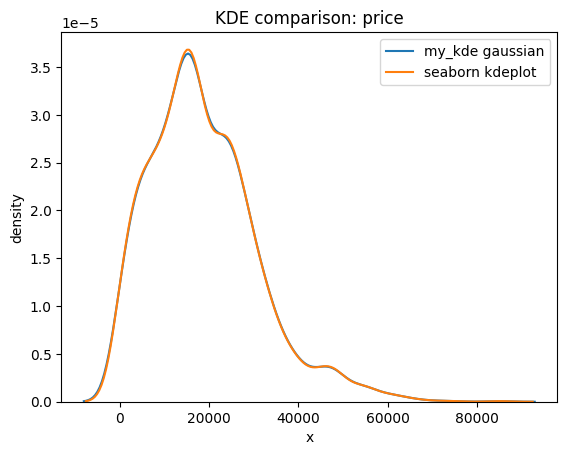

In [ ]:
cars = pd.read_csv("../data/USA_cars_datasets.csv")
x = cars["price"]

plt.figure()
plot_my_kde(x, kernel="gaussian", do_checks=True, label="my_kde gaussian")
sns.kdeplot(x=x, label="seaborn kdeplot")
plt.legend()
plt.title("KDE comparison: price")
plt.show()

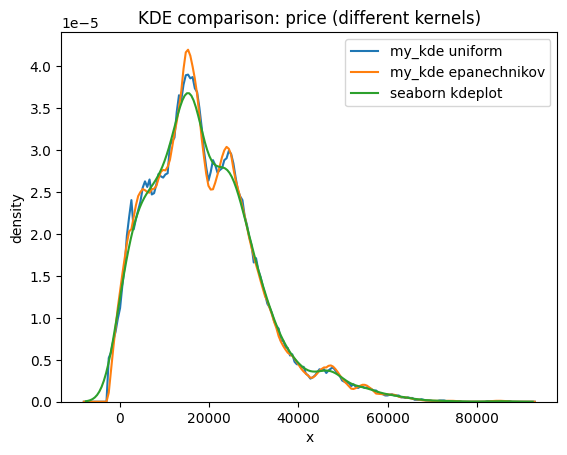

In [20]:
plt.figure()
plot_my_kde(x, kernel="uniform", do_checks=False, label="my_kde uniform")
plot_my_kde(x, kernel="epanechnikov", do_checks=False, label="my_kde epanechnikov")
sns.kdeplot(x=x, label="seaborn kdeplot")
plt.legend()
plt.title("KDE comparison: price (different kernels)")
plt.show()

KDE takes array, uses silverman (default) to choose bandwidth, supports gaussian, uniform/bump, and Epanechnikov kernerls. Uses u=(x-x_i)/h and applies the chosen kernel k(u), avg across obs, and divides by h. I verified by checking the density is non-neg, and integratres to approximately 1 and compared the plot to seaborn's kdeplot on the car dataset (they closely overlap as you can see).